<h2>Importing necessary tools for project</h2>

In [1]:
!pip install opendatasets

In [2]:
import os
import opendatasets as od
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import models , layers

C:\Users\komis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2>Downloading Data set</h2>

In [3]:
#P.S(database was already downloaded and changed)
#od.download("https://www.kaggle.com/datasets/arjuntejaswi/plant-village/")

<h2>Parameters</h2>

In [4]:
Img_size = 256
batch_size = 32
rgb_channels = 3
epochs = 50

<h2>Import and preprocessing data set</h2>

In [5]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(Img_size,Img_size),
    batch_size =batch_size
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = ds.class_names

<h2>Vizualization of data</h2>

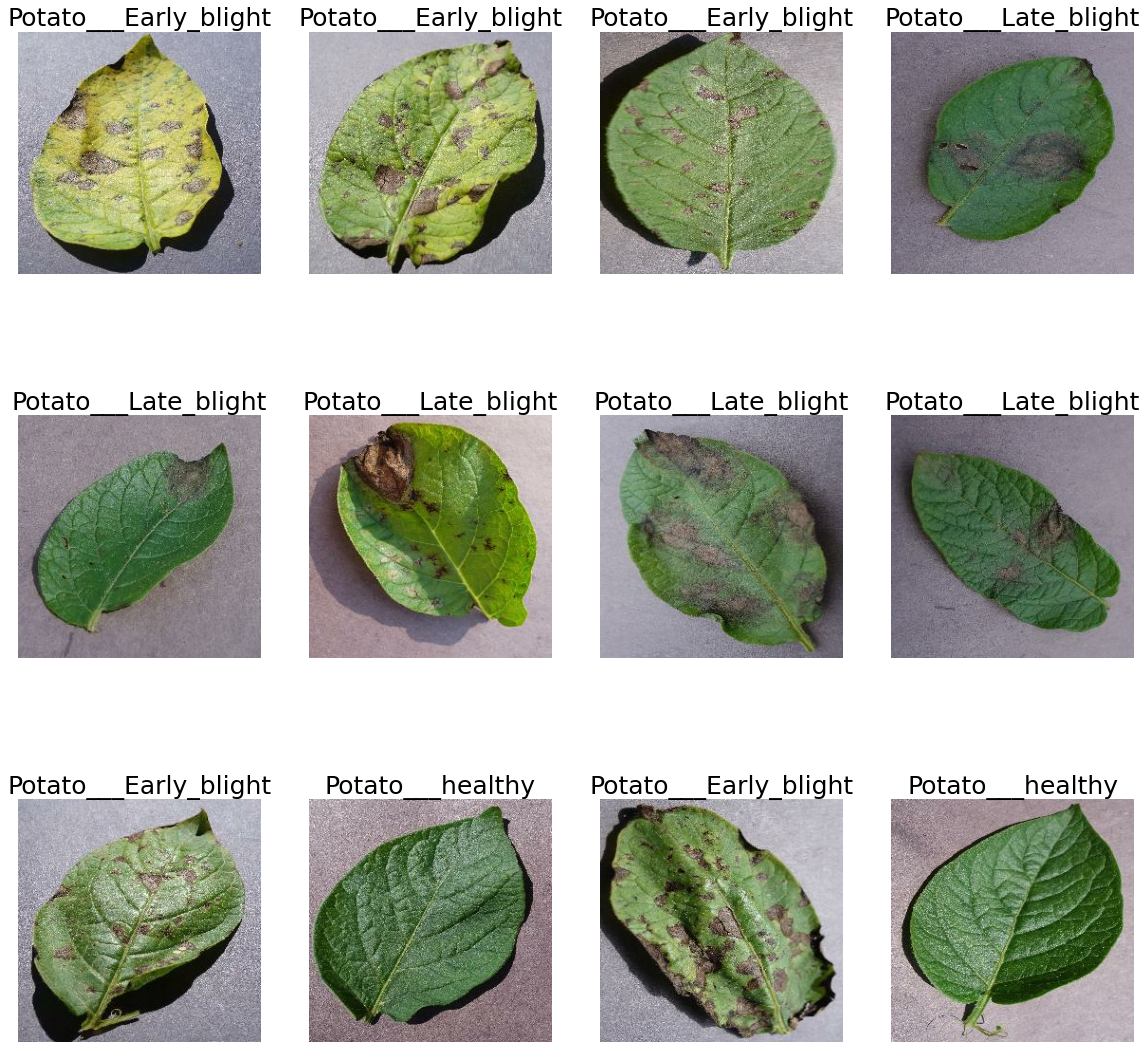

In [9]:
plt.figure(figsize=(20,20))
for image_batch , label_batch in ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]] , fontsize = 25 )
        plt.axis("off")
        

<h2>Dividing data to train , validation and test data sets </h2>

In [10]:
# 80 % = train set
# 10% =  test set
#10%  = validation

In [11]:
train_percent = 0.8
valid_percent = 0.1
test_percent = 0.1
train_size = int(train_percent * len(ds))
valid_size = int(len(ds)* valid_percent )
test_size = int(len(ds)* test_percent)

In [12]:
def get_dataset_partions_tf(
    ds,train_percent = 0.8, 
    valid_percent = 0.1, 
    test_percent = 0.1,
    shuffle =True ,
    shuffle_size = 1000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 5)
    train_size = int(train_percent * len(ds))
    valid_size = int(len(ds)* valid_percent)
    test_size = int(len(ds)* test_percent)
    
    
    train_ds = ds.take(train_size)
    
    test_ds = ds.skip(train_size).take(test_size)
    
    val_ds = ds.skip(train_size).skip(valid_size)
    
    return train_ds, val_ds , test_ds

In [13]:
train_ds , val_ds , test_ds = get_dataset_partions_tf(ds)

<h2> Data preparation </h2>

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Img_size,Img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmintation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

<h2> Building model </h2>

In [17]:
input_shape=(batch_size , Img_size, Img_size , rgb_channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmintation,
    layers.Conv2D(32,(3,3),activation = "relu",input_shape=input_shape ), #convolutional layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])
model.build(input_shape = input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [21]:
model.compile(
   optimizer= "adam",
   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
   metrics = ["accuracy"]
)

In [20]:
history = model.fit(
train_ds,
epochs = epochs,
batch_size = batch_size,
verbose = 1,
validation_data = val_ds,
)

Epoch 1/50
54/54 [==============================] - 38s 681ms/step - loss: 0.8828 - accuracy: 0.5305 - val_loss: 0.9384 - val_accuracy: 0.5156
Epoch 2/50
54/54 [==============================] - 38s 703ms/step - loss: 0.6288 - accuracy: 0.7218 - val_loss: 0.5834 - val_accuracy: 0.7266
Epoch 3/50
54/54 [==============================] - 37s 677ms/step - loss: 0.4289 - accuracy: 0.8269 - val_loss: 0.3141 - val_accuracy: 0.8789
Epoch 4/50
54/54 [==============================] - 38s 700ms/step - loss: 0.2957 - accuracy: 0.8897 - val_loss: 0.2563 - val_accuracy: 0.8828
Epoch 5/50
54/54 [==============================] - 38s 704ms/step - loss: 0.2002 - accuracy: 0.9219 - val_loss: 0.3575 - val_accuracy: 0.8672
Epoch 6/50
54/54 [==============================] - 44s 816ms/step - loss: 0.1443 - accuracy: 0.9501 - val_loss: 0.1682 - val_accuracy: 0.9297
Epoch 7/50
54/54 [==============================] - 45s 826ms/step - loss: 0.1439 - accuracy: 0.9401 - val_loss: 0.1433 - val_accuracy: 0.9414

<h2> Model evaluation</h2>

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history.params

In [ ]:
history.history.keys()

<h2>Model vizualization</h2>

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history["val_loss"]

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs) , acc , label = "training accuaracy")
plt.plot(range(epochs) , val_acc , label = "validation accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1, 2 ,2 )
plt.plot(range(epochs) , loss , label = "training loss")
plt.plot(range(epochs) , val_loss , label = "validation  loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation loss")

In [ ]:
for image_batch , label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]
    print("first image o predict")
    plt.imshow(first_image)
    plt.axis("off")
    print("first image acctual label:" , class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    